## ***Unemployment Analysis in India***

## *A Data Science Task for Internship Application*

**Name**: Ashna Imtiaz

**Role**: Aspiring Data Scientist

**Date**: 15/06/2025

**Task: 2**

## **Project** - ***Unemployment Analysis with Python***

### ***About the Dataset***

This dataset reflects the impact of the COVID-19 lockdown on employment in India. It highlights how employment opportunities were affected and how the unemployment rate increased during the pandemic.


### **`Dataset Contents`**

* **Region**: Name of the state or union territory in India.
* **Date**: The date when the data was recorded, in the format YYYY-MM-DD.
* **Frequency**: Indicates how often the data was collected. In this dataset, the frequency is monthly.
* **Estimated Unemployment Rate (%)**: The percentage of people in the labor force who were unemployed at the time.
* **Estimated Employed**: The total number of people employed in that region during the specified time period.
* **Estimated Labour Participation Rate (%)**: The percentage of the working-age population that is either employed or actively seeking employment.
* **Area**: Specifies whether the data corresponds to a rural area (outside cities and towns) or an urban area (within cities or towns).


# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [71]:
df = pd.read_csv('Unemployment_rate.csv')

print(f'shape of dataset1: {df.shape}')
df.head()

shape of dataset1: (267, 9)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5,16635535,41,South,16,80
1,Andhra Pradesh,29-02-2020,M,6,16545652,41,South,16,80
2,Andhra Pradesh,31-03-2020,M,6,15881197,39,South,16,80
3,Andhra Pradesh,30-04-2020,M,21,11336911,33,South,16,80
4,Andhra Pradesh,31-05-2020,M,17,12988845,36,South,16,80


In [80]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Unemployment_Rate,0
Employed,0
Labour_Participation,0
Zone,0
longitude,0
latitude,0


## *statistical summary*

In [116]:
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,Date,Unemployment_Rate,Employed,Labour_Participation,longitude,latitude
count,267,267,267,267,267,267
mean,2020-06-16 09:15:30.337078528,12,13962106,42,23,81
min,2020-01-31 00:00:00,0,117542,17,11,71
25%,2020-03-31 00:00:00,5,2838930,37,18,76
50%,2020-06-30 00:00:00,10,9732417,40,24,79
75%,2020-08-31 00:00:00,17,21878686,44,27,85
max,2020-10-31 00:00:00,76,59433759,70,34,93
std,NaN,11,13366318,8,6,6


## *Standardizing the Columns*

In [77]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df = df.rename(columns={'Estimated_Unemployment_Rate_(%)': 'Unemployment_Rate',
                        'Estimated_Employed': 'Employed',
                        'Estimated_Labour_Participation_Rate_(%)': 'Labour_Participation',
                        'Region.1': 'Zone'})
# standardized columns names
df.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation', 'Zone', 'longitude', 'latitude'],
      dtype='object')

In [78]:
df.head(2)

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation,Zone,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5,16635535,41,South,16,80
1,Andhra Pradesh,29-02-2020,M,6,16545652,41,South,16,80


In [79]:
df['Unemployment_Rate'].describe()

,Unemployment_Rate
count,267
mean,12
std,11
min,0
25%,5
50%,10
75%,17
max,76


# **Visualize Distribution**

## Histogram Distribution of Unemployment Rate

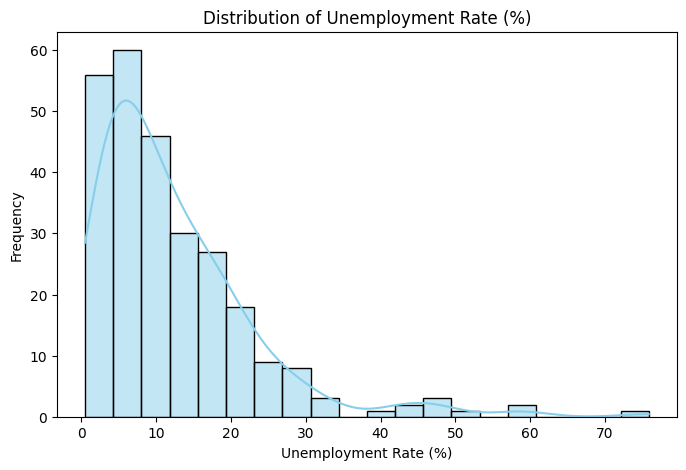

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Unemployment_Rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


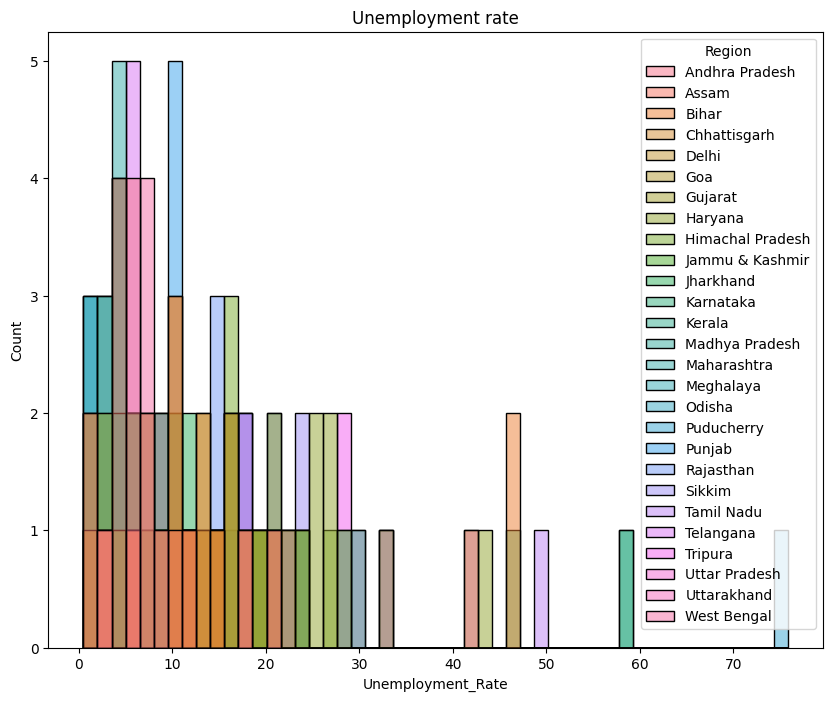

In [141]:
plt.figure(figsize=(10, 8))

plt.title('Unemployment Rate'.capitalize())
sns.histplot(x='Unemployment_Rate', hue='Region', data=df, binwidth=1.5)
plt.show()

# **Detect Outliers**

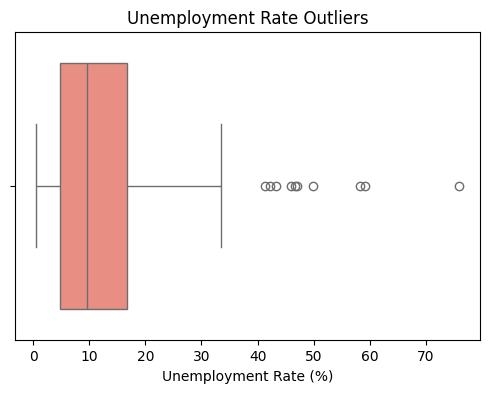

In [82]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Unemployment_Rate'], color='salmon')
plt.title('Unemployment Rate Outliers')
plt.xlabel('Unemployment Rate (%)')
plt.show()

## Average Unemployment by Zone


In [89]:
zone_avg = df.groupby('Zone')['Unemployment_Rate'].mean().sort_values(ascending=False)
print(zone_avg)

Zone
North       16
East        14
Northeast   11
South       10
West         8
Name: Unemployment_Rate, dtype: float64


## **Barplot**

<ipython-input-85-1573876852>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_avg.index, y=zone_avg.values, palette='viridis')


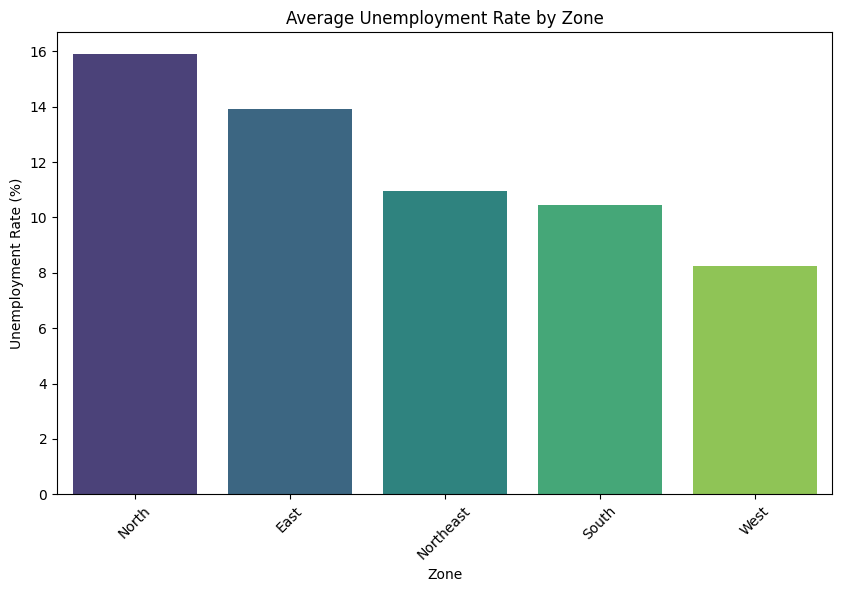

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_avg.index, y=zone_avg.values, palette='viridis')
plt.title('Average Unemployment Rate by Zone')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Zone')
plt.xticks(rotation=45)
plt.show()

The `North` and `East` zone suffered the most from unemployment

# **5. Time Trend of Unemployment**

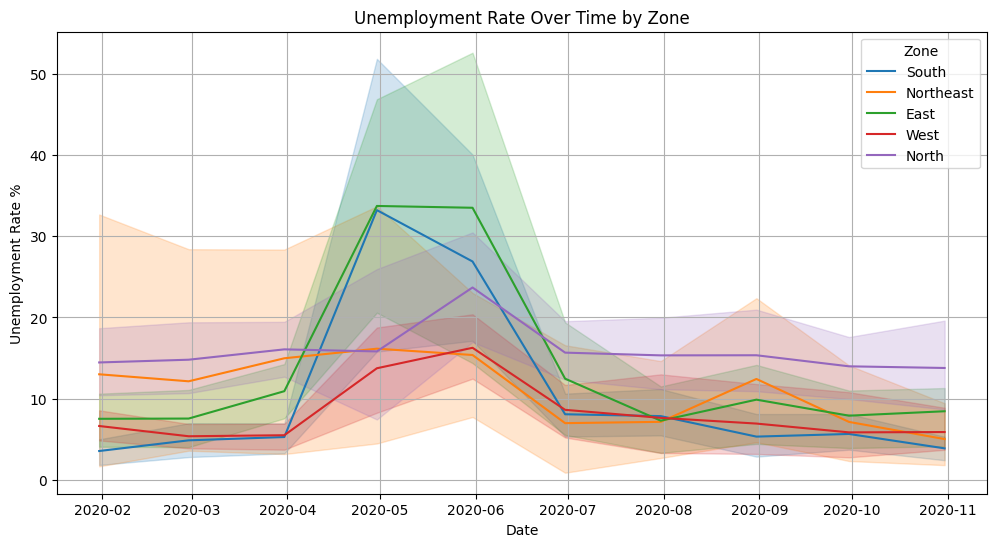

In [88]:
df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime format

plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Zone')
plt.title('Unemployment Rate Over Time by Zone')
plt.ylabel('Unemployment Rate %')
plt.xlabel('Date')
plt.legend(title='Zone')
plt.grid(True)
plt.show()


# **Objective:**

### `Evaluate how COVID-19 affected unemployment rates across different regions in India.`

### **Define the Timeline**

We need to define 3 periods:

- Pre-COVID: Before March 2020

- During Lockdown: March to June 2020

- Post-Lockdown: After June 2020

In [98]:
# add new column to mark these periods

def covid_phase(date):
    if date < pd.to_datetime('2020-03-01'):
      return 'Pre-COVID'
    elif date <= pd.to_datetime('2020-06-30'):
      return 'Lockdown'
    else:
      return 'Post Lockdown'

df['Covid_Phase'] = df['Date'].apply(covid_phase)

In [102]:
df.Covid_Phase.sample(10)

,Covid_Phase
214,Post Lockdown
246,Post Lockdown
242,Lockdown
195,Post Lockdown
107,Post Lockdown
259,Lockdown
153,Lockdown
126,Post Lockdown
10,Pre-COVID
255,Post Lockdown


## **Compare Unemployment Rates Across Phases**

In [103]:
phase_mean = df.groupby('Covid_Phase')['Unemployment_Rate'].mean()
print(phase_mean)

Covid_Phase
Lockdown        17
Post Lockdown    9
Pre-COVID        9
Name: Unemployment_Rate, dtype: float64


### *Visualize the Comparision*

In [114]:
phase_mean.index

Index(['Lockdown', 'Post Lockdown', 'Pre-COVID'], dtype='object', name='Covid_Phase')

<ipython-input-115-4059879167>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_mean.index, y=phase_mean.values, palette='mako')


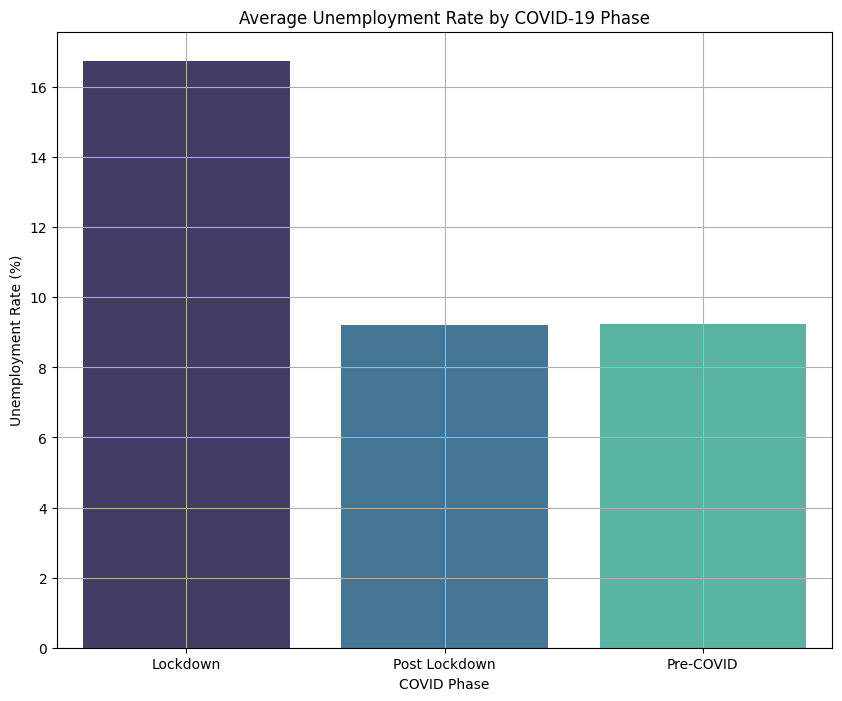

In [115]:
plt.figure(figsize=(10, 8))
sns.barplot(x=phase_mean.index, y=phase_mean.values, palette='mako')
plt.title('Average Unemployment Rate by COVID-19 Phase')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('COVID Phase')
plt.grid(True)
plt.show()

## **Region-wise Impact During Lockdown**

In [118]:
lockdown_df = df[df['Covid_Phase'] == 'Lockdown']
zone_impact = lockdown_df.groupby('Zone')['Unemployment_Rate'].mean().sort_values(ascending=False)
print(zone_impact)

Zone
East        23
South       18
North       18
Northeast   13
West        11
Name: Unemployment_Rate, dtype: float64


## **Visualize:**

<ipython-input-119-3375401498>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_impact.index, y=zone_impact.values, palette='rocket')


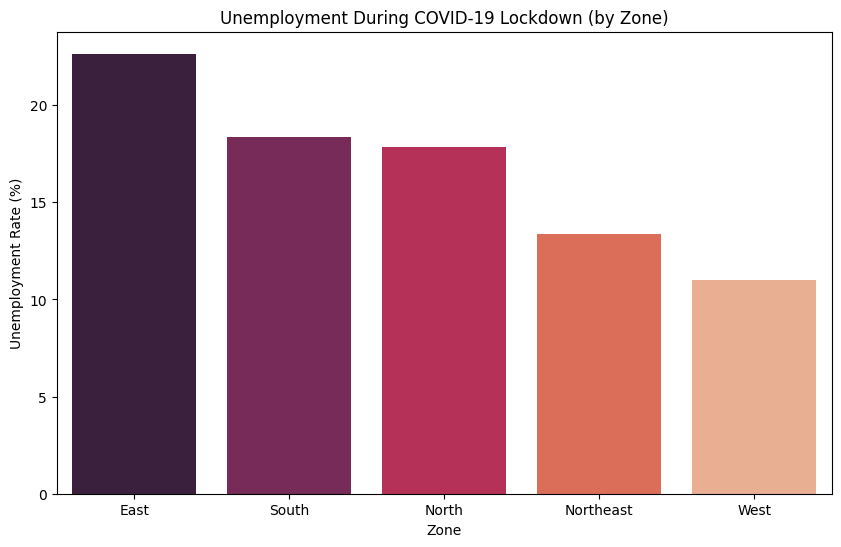

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_impact.index, y=zone_impact.values, palette='rocket')
plt.title('Unemployment During COVID-19 Lockdown (by Zone)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Zone')
plt.show()


## **Objective**
### `Analyze and uncover recurring patterns or seasonal trends in unemployment rates`

In [120]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

## **Monthly Trend Analysis**

In [122]:
# Groupy by `Month` to check if some months consistently have higher or lower unemployment.

monthly_trend = df.groupby('Month')['Unemployment_Rate'].mean()

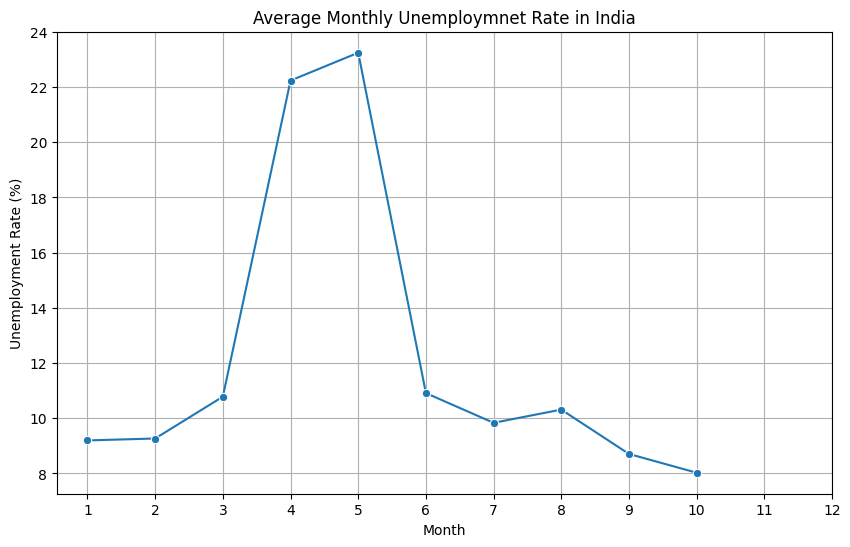

In [126]:
# plotting

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.xticks(range(1, 13))
plt.title('Average Monthly Unemploymnet Rate in India')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

## **Monthly Trends by Year**

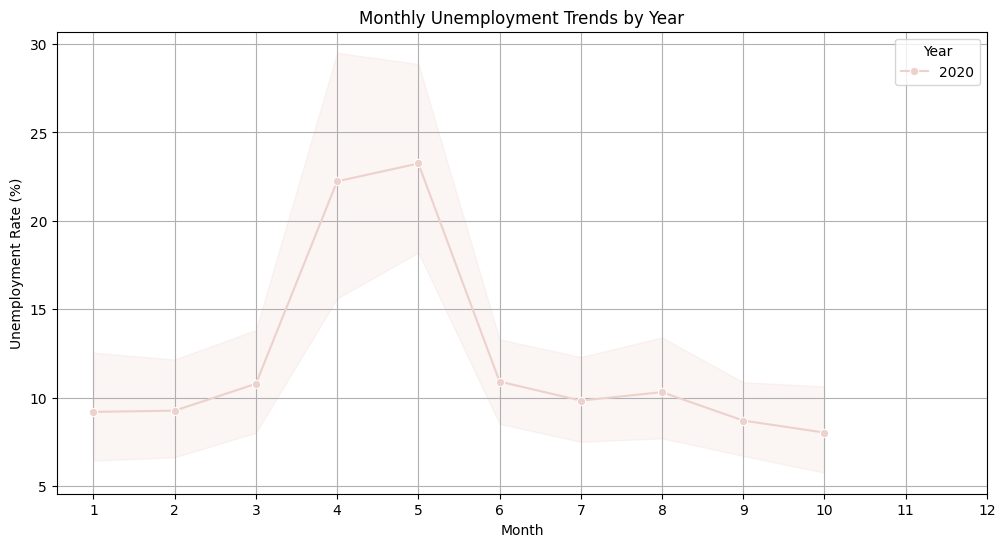

In [128]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Month', y='Unemployment_Rate', hue='Year', marker='o')
plt.title("Monthly Unemployment Trends by Year")
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


# **Correlation matrix**

In [138]:
corr_matrix = df.corr(numeric_only=True)

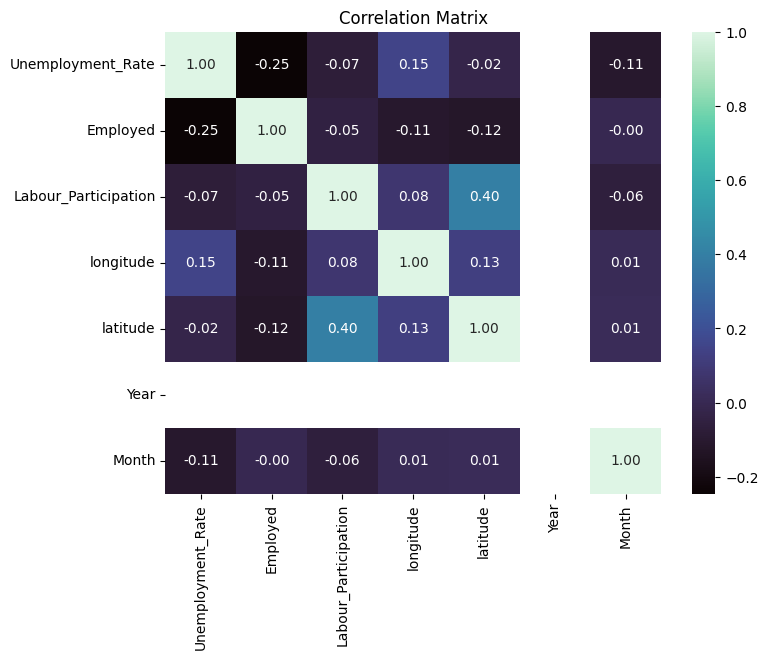

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation', 'Zone', 'longitude', 'latitude', 'Covid_Phase',
       'Year', 'Month'],
      dtype='object')

# ***SUNBURST CHART***

In [157]:
# visualize hierarchical relationships USING SUNBURST
unemployment = df[['Zone', 'Region', 'Unemployment_Rate']]
figure = px.sunburst(
    unemployment,
    path=['Zone', 'Region'],
    values='Unemployment_Rate',
    width=700,
    height=600,
    color_continuous_scale='RdYlBu',
    title='Unemployment Rate in India by Zone and Region'
)
figure.update_layout(margin=dict(t=50, l=0, r=0, b=0))
figure.show()

## *Insights from Unemployment Data for Policy Making*



## ***1. COVID-19 Caused a Big Spike in Unemployment***
During the lockdown, job loss increased suddenly across many areas.

 *`What can help:`*
- Government should create emergency plans for job and income support during future crises.

## ***2. Some Zones Have Higher Unemployment***
Areas like the Northeast and East often show more people without jobs than others.

*`What can help:`*
- Special job programs and business support can help reduce unemployment in these regions.

## ***3. Rural and Urban Areas Are Affected Differently***
City areas lose jobs faster during shutdowns, while villages are affected by seasonal farming changes.

*`What can help:`*
- Train people for other types of jobs and support local businesses in both cities and villages.

## ***4. Low Unemployment Doesn't Always Mean More Jobs***
Sometimes unemployment is low just because fewer people are looking for work.

*`What can help:`*
- Encourage people to join the workforce and make it easier, especially for women and young people.



## ***5. Jobs Slowly Returned After COVID***
After the peak of the pandemic, unemployment started going down gradually.

*`What can help:`*
- Focus on long-term recovery with training programs, public job projects, and better job tracking systems.